In [ ]:
#nie ma funkcji aktywacji
#SGD jako optimizer
#learning rate scheduling
# loss =mse
#nie ma accuracy
#moorel's law

In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Tensorflow 2.0: Deep Learning and Artificial Intelligence/images/moore.csv"
data = pd.read_csv(path, usecols=[0,1],header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [ ]:
x, y=data[0] ,data[1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Moja implementacja, loss wynosi nan lub inf i nwm dalej co z tym zrobić

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9,), loss='mse')

In [ ]:
model.fit(x_train, y_train, validation_data=[x_test, y_test], epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 72ms/step - loss: inf - val_loss: inf 
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: nan - val_loss: nan
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: nan - val_loss: nan
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: nan - val_loss: nan
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: nan - val_loss: nan
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: nan - val_loss: nan
Epoch 8/10
5/5 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 9/10
5/5 [==============================] - 0s 14ms/step - loss: nan - val_loss: nan
Epoch 10/10
5/5 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan


#### Implementacja z kursu

In [54]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
path="/content/drive/MyDrive/Tensorflow 2.0: Deep Learning and Artificial Intelligence/images/moore.csv"
data = pd.read_csv(path,header=None)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


#### Sieć neuronowa oczekuje danych które są zapisane jako 2D array [liczba_kolumn x liczba cech], więc jeśli mamy jedną ceche to musimy mieć [liczba_kolumn x 1], robi to funkcja .reshape(-1, 1)
    x=data[:, 0].reshape(-1,1)

In [55]:
x=np.array(data[0]).reshape(-1,1)
y=np.array(data[1])

#### Dane mają wykres wykładniczy przez co nie widzimy przebiegu dla wcześniejszych lat na wykresie, możemy wykorzystać funkcję logarytmiczną - np.log() żeby wykres przybrał wyglad liniowy. Na tak zamienionych danych będziemy chcieli tworzyć regresje liniową

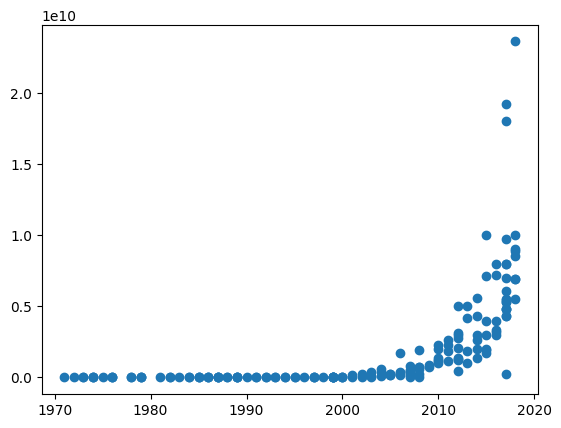

In [56]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

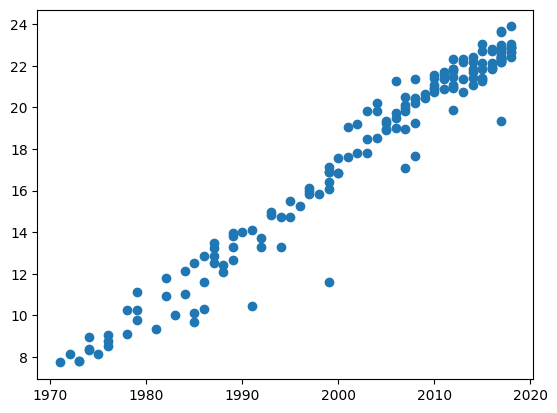

In [57]:
y=np.log(y)
plt.scatter(x,y)
plt.show()

Dane trzeba z przedziału 1970 - 2020, przydało ustandaryzować przed uczeniem żeby szukanie minimum działało poprawnie, w takim wypadku dane wyjściowe też trzeba byłoby ustandaryzować w duga stronę żeby odzyskać z przykładowej wartości 0.233 - 2022

W Kursie autor mówi o przesunięciu danych poprzez odjęcie wartości średniej od wszystkich lat, w ten sposób wartość średnia będzie równa 0 ułatwi to optymalizację, można byłoby całkowicie ustandaryzować dane.

!!! Uwaga, dla sieci neuronowej szukanie rozwiazania rozwiązania jest o wiele trudniejsze jeśli nie ma standaryzacji danych, dlatego w tym przykładzie korzystamy z innego optimizera niż "adam" ponieważ problem który rozwiązujemy jest truniejszy dla sieci więc dostosowujemy inny optimizer

In [58]:
x=x-x.mean()

In [59]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [60]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), #learning_rate, momentum - parametry potrzebne przy optymalizacji
    loss='mse'
)

In [61]:
def schedule(epoch, lr):# zmiana learning_ratingu w trakcie uczenia
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [62]:
r=model.fit(x,y,epochs=50, callbacks=[scheduler])

Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 528.8715 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 3ms/step - loss: 423.2480 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 309.9540 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 309.4867 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 334.8878 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 335.0719 - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 315.9931 - lr: 0.0010
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 239.1417 - lr: 0.0010
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 283.2692 - lr: 0.0010
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 71.9147 - lr: 0.0010
Epoch 11/50
6/6 [==============================] - 0s 3ms/step - loss: 61.4610 -

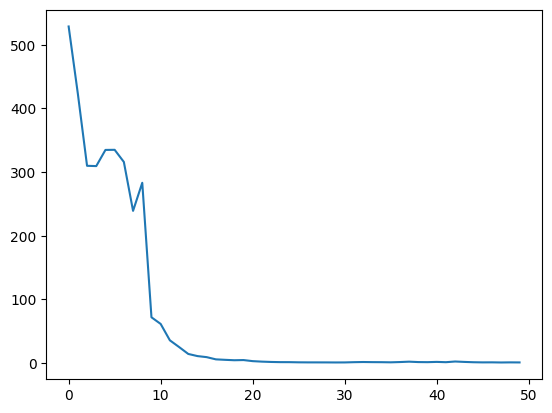

In [63]:
plt.plot(r.history['loss'])

# Porówanie
a) czyste dane

b) przesunięte dane

c) znormalizowane dane

d) ustandaryzowane dane

### a) czyste dane - dane bez żadnych zmian

In [86]:
data = pd.read_csv(path,header=None)
data.head()

x=np.array(data[0]).reshape(-1,1)
y=np.array(data[1])

y=np.log(y)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), #learning_rate, momentum - parametry potrzebne przy optymalizacji
    loss='mse'
)
def schedule(epoch, lr):# zmiana learning_ratingu w trakcie uczenia
  if epoch>=10:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r=model.fit(x,y,epochs=50, callbacks=[scheduler])


Epoch 1/50
6/6 [==============================] - 0s 3ms/step - loss: inf - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: nan - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: nan - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: nan - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: nan - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: nan - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: nan - lr: 0.0010
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: nan - lr: 0.0010
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: nan - lr: 0.0010
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: nan - lr: 0.0010
Epoch 11/50
6/6 [==============================] - 0s 3ms/step - loss: nan - lr: 1.0000e-04
Epoch 12/50
6/6 [====================

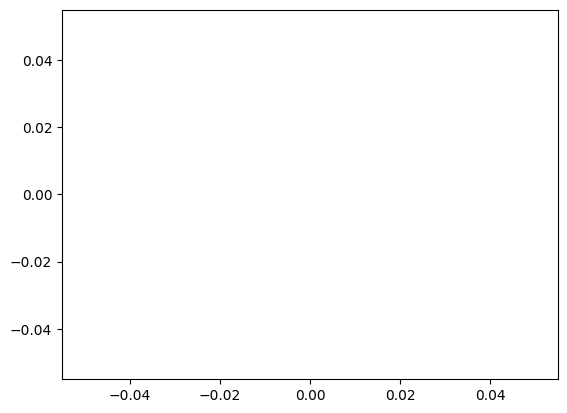

In [87]:
plt.plot(r.history['loss']) #brak danych, przez brak standaryzacji, loss jest równe albo nan albo inf, model nie uczy się poprawnie

In [89]:
x[0:10]

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976]])

### b) przesunięte dane - odejmujemy x.mean()
-od cechy żeby warość średnia była równa 0, pomaga to w nauce modelu

In [90]:
data = pd.read_csv(path,header=None)
data.head()

x=np.array(data[0]).reshape(-1,1)
y=np.array(data[1])

y=np.log(y)
x=x-x.mean()#  odejmowanie wartości średniej

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), #learning_rate, momentum - parametry potrzebne przy optymalizacji
    loss='mse'
)
def schedule(epoch, lr):# zmiana learning_ratingu w trakcie uczenia
  if epoch>=10:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r=model.fit(x,y,epochs=50, callbacks=[scheduler])


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 332.1493 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 321.0038 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 289.9426 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 227.5111 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 178.3148 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 208.0916 - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 197.0457 - lr: 0.0010
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 98.8713 - lr: 0.0010
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 230.1174 - lr: 0.0010
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 184.0719 - lr: 0.0010
Epoch 11/50
6/6 [==============================] - 0s 3ms/step - loss: 490.1150 

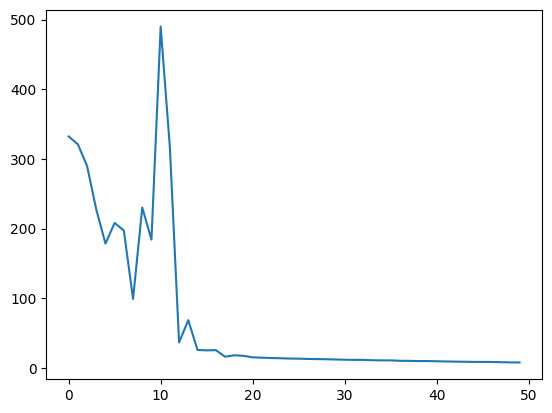

In [91]:
plt.plot(r.history['loss']) #przesunięcie sprawia że nasz model uczy się poprawnie

In [92]:
x[0:10]

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086]])

### c) znormalizowane dane - odejmujemy wartość średnią i dzielimy przez warian

In [102]:
data = pd.read_csv(path,header=None)
data.head()

x=np.array(data[0]).reshape(-1,1)
y=np.array(data[1])

y=np.log(y)
x=tf.keras.utils.normalize(x, axis=0)#  znormalizowanie danych , axis = 0  oznacza że normalizacja jest dla pierwszej kolumny, w innym wypadku wartości byłyby równe [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), #learning_rate, momentum - parametry potrzebne przy optymalizacji
    loss='mse'
)
def schedule(epoch, lr):# zmiana learning_ratingu w trakcie uczenia
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r=model.fit(x,y,epochs=50, callbacks=[scheduler])


Epoch 1/50
6/6 [==============================] - 1s 5ms/step - loss: 334.0858 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 304.1943 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 259.7035 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 213.4051 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 171.4013 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 136.4258 - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 108.4641 - lr: 0.0010
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 86.0920 - lr: 0.0010
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 69.1817 - lr: 0.0010
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 56.6700 - lr: 0.0010
Epoch 11/50
6/6 [==============================] - 0s 3ms/step - loss: 47.1806 - l

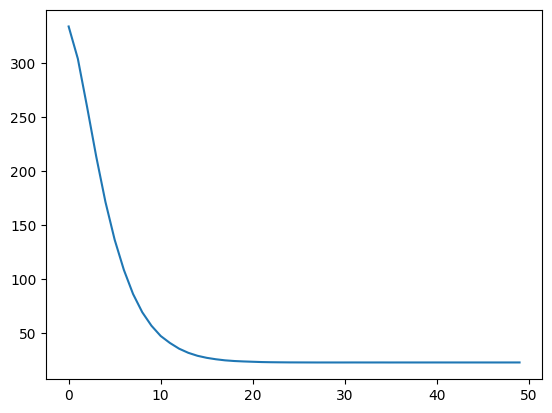

In [103]:
plt.plot(r.history['loss']) #przesunięcie sprawia że nasz model uczy się poprawnie

In [105]:
x[0:10]

array([[0.07734141],
       [0.07738065],
       [0.07741989],
       [0.07741989],
       [0.07745913],
       [0.07745913],
       [0.07745913],
       [0.07749837],
       [0.07753761],
       [0.07753761]])

### d) ustandaryzowane dane - ustandaryzowanie danych

In [110]:
data = pd.read_csv(path,header=None)
data.head()

x=np.array(data[0]).reshape(-1,1)
y=np.array(data[1])

y=np.log(y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x) #  znormalizowanie danych , axis = 0  oznacza że normalizacja jest dla pierwszej kolumny, w innym wypadku wartości byłyby równe [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), #learning_rate, momentum - parametry potrzebne przy optymalizacji
    loss='mse'
)
def schedule(epoch, lr):# zmiana learning_ratingu w trakcie uczenia
  if epoch>=10:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r=model.fit(x,y,epochs=50, callbacks=[scheduler])


Epoch 1/50
6/6 [==============================] - 1s 5ms/step - loss: 327.3830 - lr: 0.0010
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 295.0546 - lr: 0.0010
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 247.9554 - lr: 0.0010
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 199.3868 - lr: 0.0010
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 155.2912 - lr: 0.0010
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 119.4412 - lr: 0.0010
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 89.8947 - lr: 0.0010
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 66.9230 - lr: 0.0010
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 49.8698 - lr: 0.0010
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 36.8873 - lr: 0.0010
Epoch 11/50
6/6 [==============================] - 0s 5ms/step - loss: 27.7200 - lr

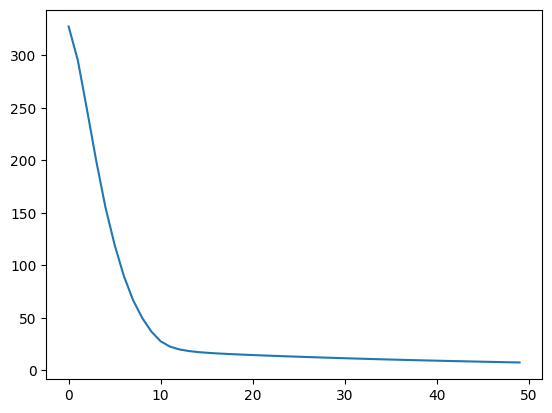

In [111]:
plt.plot(r.history['loss']) #przesunięcie sprawia że nasz model uczy się poprawnie

In [112]:
x[0:10]

array([[-2.28593353],
       [-2.21266063],
       [-2.13938773],
       [-2.13938773],
       [-2.06611483],
       [-2.06611483],
       [-2.06611483],
       [-1.99284193],
       [-1.91956903],
       [-1.91956903]])